## Открытие данных и загрузка библиотек
<a id="start"></a>

### Библиотеки

In [1]:
# достаём библиотеки
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# библиотека сиборн для визуализации на Питоне поверх matplotlib
import seaborn as sns

In [2]:
# Импорт библиотеки высокоуровневых математических функций
import numpy as np

from statsmodels.stats.proportion import proportions_ztest

In [3]:
# лаконичный, последовательный, высокоуровневый API для создания фигур
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [5]:
# уберём warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [6]:
import datetime as dt

# Модуль Re для регулярных выражений в Python
import re

### Настройки

In [7]:
# format вывода значений в виде числа с 3-мя знаками после запятой
pd.options.display.float_format = '{:,.3f}'.format

In [8]:
# количество отображаемых столбцов
# pd.options.display.max_columns = 200
pd.set_option('max_columns',None)

### Вывод данных

#### Таблица "game_actions"

In [9]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    game_actions = pd.read_csv('/datasets/game_actions.csv', sep=',')
except:
    game_actions = pd.read_csv('my_datasets/game_actions.csv', sep=',')
    
display(game_actions.head(5))

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [10]:
# хвост
display(game_actions.tail())

,event_datetime,event,building_type,user_id,project_type
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN
135639,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN


In [11]:
# случайные строки
display(game_actions.sample(8, random_state=1))

,event_datetime,event,building_type,user_id,project_type
24987,2020-05-06 19:04:01,building,assembly_shop,bf21faaf-47e9-4229-b3b9-ef4264251156,NaN
5497,2020-05-04 16:28:35,building,assembly_shop,8029fa65-9213-45b5-a469-dec881c192b1,NaN
32144,2020-05-07 11:12:57,building,spaceport,90e67a59-730d-4bdf-86da-1ce9b5f33600,NaN
117833,2020-05-16 13:04:15,building,spaceport,99b93f89-23c3-4f2e-91cd-344919cddd5a,NaN
74898,2020-05-10 18:42:50,building,assembly_shop,cb309d64-e80f-4eec-90af-704b70cd2edd,NaN
125620,2020-05-18 13:25:48,building,spaceport,ddb40b85-0eaf-4cb1-b60a-d720accaa373,NaN
125487,2020-05-18 12:10:35,building,research_center,e10eae9e-bc5c-4b01-bc62-0ac8fe5cf8a1,NaN
50113,2020-05-09 00:05:56,building,assembly_shop,44a3a8ba-e52a-4bbb-ad51-9cf86e91412d,NaN


In [12]:
# глянем на строки с NaN в building_type
game_actions[game_actions['building_type'].isna()].head()

,event_datetime,event,building_type,user_id,project_type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN


In [13]:
# уверен NaN также и  есть project 
game_actions[game_actions['event'] == 'project'].head(3)

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly


In [14]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


Возможно NaN в **building_type** связан с finished_stage_1 и project. А пропуски в **project_type** есть везде, кроме строк с project в **event**. Проверим это

In [15]:
# делаем срез по пропускам и смотрим уникальные типы событий для них
game_actions[game_actions['building_type'].isna()]['event'].unique()

array(['finished_stage_1', 'project'], dtype=object)

In [16]:
# делаем срез по пропускам и смотрим уникальные типы событий для них
game_actions[game_actions['project_type'].isna()]['event'].unique()

array(['building', 'finished_stage_1'], dtype=object)

В столбцах *building_type* и *project_type* мы видим пропущенные значения. В первом случае пропущенные появляются, когда происходит событие **finished_stage_1** либо **project**. Во втором появилось, т.к. событие не является **satellite_orbital_assembly**. Удалять их точно не стоит. *event_datetime* необходимо привести к формату даты и времени

#### Таблица "user_source"

In [17]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    user_source = pd.read_csv('/datasets/user_source.csv', sep=',')
except:
    user_source = pd.read_csv('my_datasets/user_source.csv', sep=',')
    
display(user_source.head(5))

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [18]:
user_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


Пропущенных значений не отмечено

#### Таблица "ad_costs"

In [19]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    ad_costs = pd.read_csv('/datasets/ad_costs.csv', sep=',')
except:
    ad_costs = pd.read_csv('my_datasets/ad_costs.csv', sep=',')
    
display(ad_costs.head())

,source,day,cost
0,facebook_ads,2020-05-03,935.883
1,facebook_ads,2020-05-04,548.354
2,facebook_ads,2020-05-05,260.186
3,facebook_ads,2020-05-06,177.982
4,facebook_ads,2020-05-07,111.767


In [20]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


Пропущенных так же не видно. Но *day* нужно привести к формату даты и времени

### Вывод

Мы загрузили библиотеки. Посмотрели данные. Нашли пропущенные значений в таблице *game_actions*. Связаны они не с ошибками, удалять их не стоит. *event_datetime* и *day* нужно привести к формату даты и времение 

## Предобработка данных
<a id="preprocessing"></a>

### Изучение данных
<a id="learning"></a>

In [21]:
# в цикле выводим `value_counts()` для каждого столбца

for col in game_actions.columns:
    print(str(col))
    display(game_actions[col].value_counts())

event_datetime


2020-05-07 03:10:43    4
2020-05-10 03:08:18    4
2020-05-09 12:35:56    4
2020-05-04 04:02:30    4
2020-05-08 21:56:19    4
                      ..
2020-05-08 00:48:18    1
2020-05-08 06:58:56    1
2020-05-16 19:53:13    1
2020-05-07 16:31:40    1
2020-05-20 01:39:38    1
Name: event_datetime, Length: 128790, dtype: int64

event


building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

building_type


spaceport          59325
assembly_shop      54494
research_center    14138
Name: building_type, dtype: int64

user_id


bf542075-e3a2-4e79-82d8-3838e86d2a25    22
d6aca06a-cd75-4cd8-b8cd-240a3c163884    22
ff841992-d93b-462e-bc6e-18c24a514f36    22
aee12ade-c6fa-4b31-a308-bd750c8511dc    21
81fac0a1-fb17-4d48-90fe-50dc5e9ae5ab    21
                                        ..
e17fd642-a43d-41d4-86a8-c81c6107f9cc     1
106ce4de-1d43-4746-913d-bfa1d09128a0     1
f503e280-dfdd-439b-afcd-af93433aec42     1
782a870b-99a9-452a-a41f-63c058d1174c     1
f0425383-12f3-4a1d-9f8b-5ceea106a5f9     1
Name: user_id, Length: 13576, dtype: int64

project_type


satellite_orbital_assembly    1866
Name: project_type, dtype: int64

Подозрительных значений не видно, все категориальные переменные верны. Уже здесь мы можем сравнить, что первый уровень в основном завершают через победу на другим игроком, а не строительством проекта, но точно это посчтиаем далее

In [22]:
# в цикле выводим `value_counts()` для каждого столбца

for col in user_source.columns:
    print(str(col))
    display(user_source[col].value_counts())

user_id


2093d54b-6720-4bd3-beab-7ff5a380abb5    1
e44bbb34-ca2c-4ad5-a18b-7110d686c4e9    1
1142065c-5fa0-4a32-866f-791de4bddca5    1
60bcda10-3ba5-4acd-bc58-b149a6235f4e    1
35322b7c-af7c-4283-b84d-f5b32f6e9958    1
                                       ..
9e104e3b-dacd-4062-bb55-f352f89531c9    1
01766a0c-d9e3-41b5-b73c-a9c351cd616b    1
748598ab-f186-453d-b339-641a6c554826    1
2bbc4708-baad-4ace-896e-d4224723324b    1
6443c4fd-812c-4c96-96f6-c49f6debac3e    1
Name: user_id, Length: 13576, dtype: int64

source


yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

Ошибок так же нет в источниках. Можем даже сразу составить список источников, сколько игроков пришло из каждого:
- yandex_direct              4817
- instagram_new_adverts      3347
- facebook_ads               2726
- youtube_channel_reklama    2686

В *ad_costs* данных не много, ранее мы видели, что все значения там корректны

### Обработка дубликатов
<a id="duplicates"></a>

In [23]:
game_actions.duplicated().sum()

1

In [24]:
# посмотрим на этот дубликат
game_actions_duplicat = game_actions[game_actions.duplicated(keep=False)]
game_actions_duplicat

,event_datetime,event,building_type,user_id,project_type
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN


Отправим техподдержке, а пока удалим его

In [25]:
game_actions = game_actions.drop_duplicates().reset_index(drop=True)
game_actions.duplicated().sum()

0

In [26]:
# теперь дубликаты по источникам
user_source.duplicated().sum()

0

Отлично, никаких "мёртвых душ" для прихода пользователей по источникам

### Работа с пропущенными значениями
<a id="null"></a>

In [27]:
# заменим пропущенные в project_type на нули
# game_actions['project_type'] = game_actions['project_type'].fillna(0)

# а satellite_orbital_assembly на 1
# game_actions = game_actions.replace({'project_type':{'satellite_orbital_assembly':1}})

# game_actions['project_type'].value_counts()

Пока не будем заменять пропущенные значения столбце 'project_type'. Есть мысль заменить значения на нули и единицы, но пока посмотрим, будут ли они нам мешать

In [28]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
event_datetime    135639 non-null object
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


В столбце *building_type* пропущенные значения менять пока не буду, считать они нам там не помешают. 

### Работа с типами данных
<a id="type"></a>

In [29]:
# заменим event_datetime на тип даты и времени
# game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [30]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format="%Y-%m-%d %H:%M:%S")

In [31]:
# добавим столбец с датой
game_actions['date'] = game_actions['event_datetime'].dt.date
game_actions['date'] = pd.to_datetime(game_actions['date'], format="%Y-%m-%d %H:%M:%S")
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04


In [32]:
# повторим всё для ad_costs
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null datetime64[ns]
cost      28 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [33]:
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 6 columns):
event_datetime    135639 non-null datetime64[ns]
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
date              135639 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 6.2+ MB


Вроде всё везде красиво заменилось на нужные типы данных

### Изучение аномалий и выбросов

In [34]:
# создадим сводную таблицу и посчитаем суммарное кол-во различных зданий по дням
game_actions_count_building = game_actions.pivot_table(index=['date'],
                                        columns='building_type', values='user_id', aggfunc='count')
game_actions_count_building.head(5)

building_type,assembly_shop,research_center,spaceport
date,,,
2020-05-04,"7,767.000",nan,403.000
2020-05-05,"7,816.000",nan,"1,236.000"
2020-05-06,"7,736.000",5.000,"2,180.000"
2020-05-07,"7,775.000",31.000,"3,041.000"
2020-05-08,"7,833.000",123.000,"4,074.000"


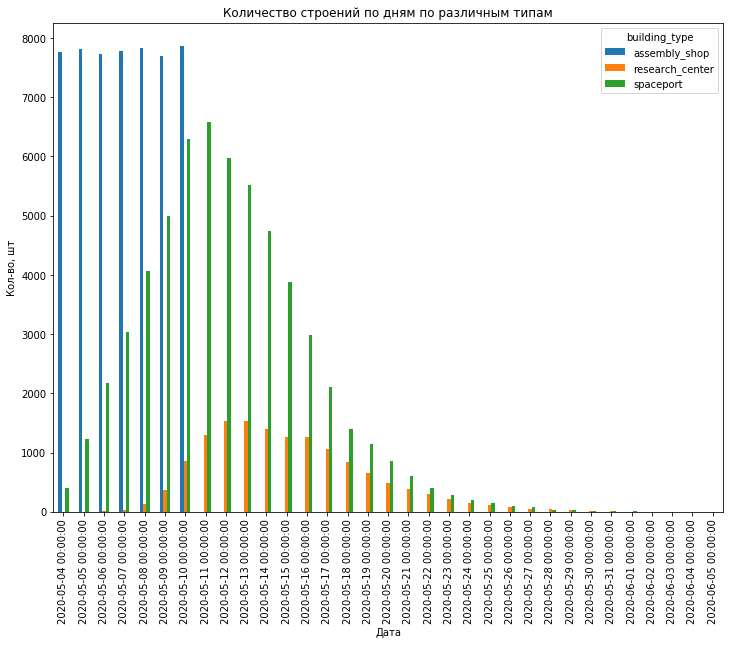

In [35]:
# построим гистограмму 
game_actions_count_building.plot(y=['assembly_shop', 'research_center', 'spaceport'],
                          kind='bar',
                          figsize=(12, 9))
plt.title('Количество строений по дням по различным типам')
plt.ylabel('Кол-во, шт')
plt.xlabel('Дата')
plt.show()

In [36]:
# найдём время первого события
# сначала сгруппируем по пользователям типы зданий и их первое время
firts_building = game_actions.groupby(['user_id','building_type'])['event_datetime'].min().reset_index()

# далее выделим в отдельный столбец время первой постройки
time_first_event = game_actions.groupby('user_id')['event_datetime'].min()
time_first_event.name = 'time_first_event'
firts_building = firts_building.join(time_first_event, on='user_id')

firts_building

,user_id,building_type,event_datetime,time_first_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,assembly_shop,2020-05-06 01:07:37,2020-05-06 01:07:37
1,0001f83c-c6ac-4621-b7f0-8a28b283ac30,research_center,2020-05-20 11:26:06,2020-05-06 01:07:37
2,0001f83c-c6ac-4621-b7f0-8a28b283ac30,spaceport,2020-05-11 17:10:00,2020-05-06 01:07:37
3,00151b4f-ba38-44a8-a650-d7cf130a0105,assembly_shop,2020-05-06 03:09:12,2020-05-06 03:09:12
4,00151b4f-ba38-44a8-a650-d7cf130a0105,spaceport,2020-05-11 11:49:18,2020-05-06 03:09:12
...,...,...,...,...
34473,ffff194a-56b7-4c12-860d-3485242ae7f5,assembly_shop,2020-05-04 20:28:28,2020-05-04 20:28:28
34474,ffff194a-56b7-4c12-860d-3485242ae7f5,spaceport,2020-05-11 22:04:30,2020-05-04 20:28:28
34475,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,assembly_shop,2020-05-08 06:57:30,2020-05-08 06:57:30
34476,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,research_center,2020-05-17 22:48:25,2020-05-08 06:57:30


In [37]:
# далее сделаем срез и определим первое здание, которое строят игроки и посчитаем их
firts_building[firts_building['event_datetime'] == firts_building['time_first_event']]['building_type'].value_counts()

assembly_shop    13576
Name: building_type, dtype: int64

График показывает нормальное распределение по каждому типу зданий по дням. Это говорит нам о том, что аномальных выбросов по строительству среди игроков в эти дни не было. Не совсем красиво идёт *assembly-shop*, резко обрывается. Возможно это важное стартовое здание без сильного развития. Схожу за кофе и уточню у разработчиков

In [38]:
# создадим сводную таблицу и посчитаем суммарное кол-во различных событий по дням
game_actions_count_event = game_actions.pivot_table(index=['date'],
                                        columns='event', values='user_id', aggfunc='count')
game_actions_count_event.head(5)

event,building,finished_stage_1,project
date,,,
2020-05-04,"8,170.000",1.000,nan
2020-05-05,"9,052.000",3.000,nan
2020-05-06,"9,921.000",4.000,nan
2020-05-07,"10,847.000",11.000,nan
2020-05-08,"12,030.000",28.000,1.000


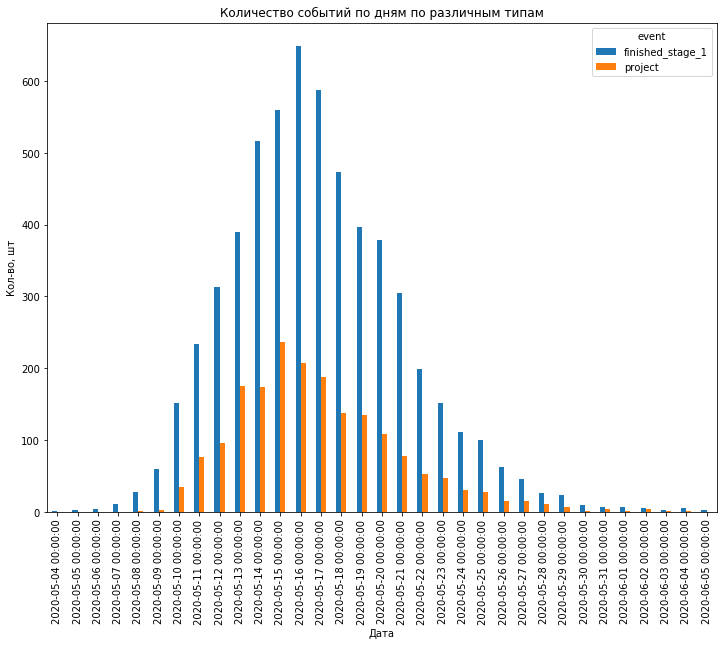

In [39]:
# построим гистограмму 
game_actions_count_event.plot(y=['finished_stage_1', 'project'],
                          kind='bar',
                          figsize=(12, 9))
plt.title('Количество событий по дням по различным типам')
plt.ylabel('Кол-во, шт')
plt.xlabel('Дата')
plt.show()

Столбец с количеством событий *building* я убрал, сильно затеняет он результаты по другим событиям. Косвенно мы его всё равно рассмотрели ранее. Что касается двух остальных событий *project* и *finished_stage_1*, то их кол-во показывает нормальное распределений без заметных выбросов

Пик завершения проекта приходится на 15.05.2020, а самого уровня на 16.05

#### Проверим, всели игроки завершают проект и уровень один раз

In [40]:
count_finish = game_actions[game_actions['event'] == 'finished_stage_1']

print("Количство строк в датасете завершения уровня:", len(count_finish))

print("Количство уникальных пользователей в датасете завершения уровня:", count_finish['user_id'].nunique())

Количство строк в датасете завершения уровня: 5817
Количство уникальных пользователей в датасете завершения уровня: 5817


In [41]:
count_finish = game_actions[game_actions['event'] == 'project']

print("Количство строк в датасете завершения проекта:", len(count_finish))

print("Количство уникальных пользователей в датасете завершения проекта:", count_finish['user_id'].nunique())

Количство строк в датасете завершения проекта: 1866
Количство уникальных пользователей в датасете завершения проекта: 1866


### Выводы

Мы изучили данные. Каких то странных значений в базе мы не обнаружили. Заменили тип данных в столбцах с датой и временем, при этом добавив отдельный столбец с датой. Заменили пропущенные значения в *project_type* на нули, а значение проекта на 1, в бинарной системе проще работать с цифрой. В других столбцах не стал заменять, это не какая то ошибка в данных, в дальнейших вычислениях нам это не помешает. А создание других категорий, например в столбце *building_type* занчениями из *event* будет мешать некоторым вычислениям, например посчитать долью в строительстве зданий каждого типа

Каких то аномалий и выбросов не отмечено. Посчитав количество зданий по типам и дням, события по дням - мы видим нормальное распределение. Игроки по разу проходят уровень и строят проект

## Проведение исследовательского анализа
<a id="eda"></a>

### Сколько всего игроков в данных? Как распределены события по ним?

In [42]:
print('Всего игроков: {:.1F}'.format(game_actions['user_id'].nunique()))

Всего игроков: 13576.0


In [43]:
event_gamer = game_actions.groupby('event', as_index=True)['user_id'].nunique().reset_index()
event_gamer = event_gamer.rename(columns={'user_id':'count_id'})
event_gamer

,event,count_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


In [44]:
print('Доля игроков, закончивших первый уровень: {:.1%}'.format(
    event_gamer.loc[1,'count_id']/
    event_gamer.loc[0,'count_id']))

Доля игроков, закончивших первый уровень: 42.8%


In [45]:
print('Доля игроков, закончивших первый уровень через проект: {:.1%}'.format(
    event_gamer.loc[2,'count_id']/
    event_gamer.loc[0,'count_id']))

Доля игроков, закончивших первый уровень через проект: 13.7%


In [46]:
print('Доля игроков, закончивших первый уровень через победу над врагом: {:.1%}'.format(
    (event_gamer.loc[1,'count_id'] - event_gamer.loc[2,'count_id'])/
    event_gamer.loc[0,'count_id']))

Доля игроков, закончивших первый уровень через победу над врагом: 29.1%


- Всего игроков у нас 13576, все они начинают строить здания. 
- Доля игроков, закончивших первый уровень: 42.8%
- Доля игроков, закончивших первый уровень через проект: 13.7%
- Доля игроков, закончивших первый уровень через победу над врагом: 29.1%


### Сколько игроков привлекли различные источники?

In [47]:
user_source['user_id'].nunique()

13576

In [48]:
# сгруппируем и посчитаем, сколько пользователей пришли через источники. 
# в таблице они все уникальные
user_source_count = user_source.groupby('source').count().rename(columns={'user_id':'count_id'}).reset_index()

In [49]:
# посчитаем процент от общего числа
user_source_count['per_gamer'] = user_source_count['count_id'] / user_source_count['count_id'].sum()
user_source_count

,source,count_id,per_gamer
0,facebook_ads,2726,0.201
1,instagram_new_adverts,3347,0.247
2,yandex_direct,4817,0.355
3,youtube_channel_reklama,2686,0.198


- 	facebook_ads 	        2726 игроков или 20,1%
- 	instagram_new_adverts 	3347 игроков или 24,7%
- 	yandex_direct 	        4817 игроков или 35,5%
- 	youtube_channel_reklama 2686 игроков или 19,8%

### Какой процент игрков проходит первый уровень в разрезе источников?

In [50]:
# сначала добавим источники для каждого игрока
game_actions_source = game_actions.merge(user_source, on='user_id')
game_actions_source.head()

,event_datetime,event,building_type,user_id,project_type,date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,youtube_channel_reklama


In [51]:
# создадим сводную таблицу и посчитаем уникальных пользователей для каждого события по источникам
event_gamer_source = game_actions_source.pivot_table(index=['event'],
                                        columns='source', values='user_id', aggfunc='nunique')
event_gamer_source.head(5)

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
event,,,,
building,2726,3347,4817,2686
finished_stage_1,1150,1466,2042,1159
project,391,476,620,379


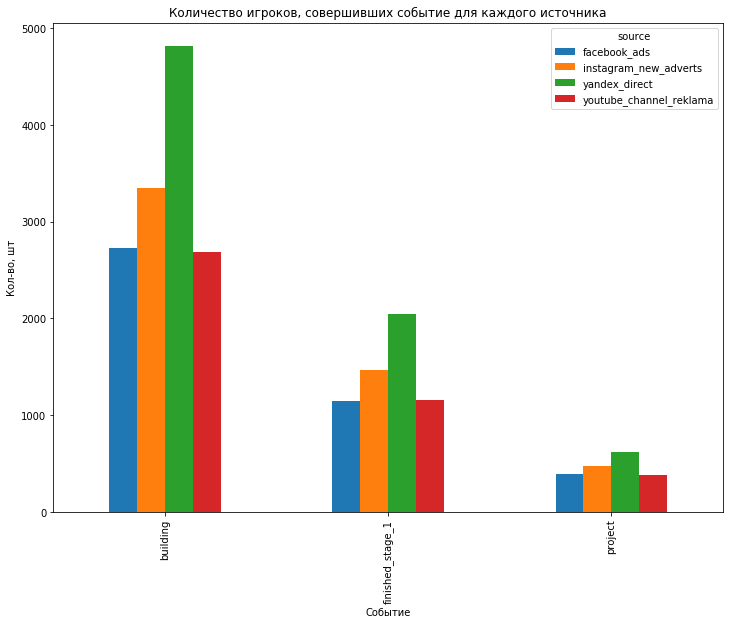

In [52]:
# построим гистограмму 
event_gamer_source.plot(y=['facebook_ads',
                           'instagram_new_adverts', 
                           'yandex_direct',
                           'youtube_channel_reklama'],
                          kind='bar',
                          figsize=(12, 9))
plt.title('Количество игроков, совершивших событие для каждого источника')
plt.ylabel('Кол-во, шт')
plt.xlabel('Событие')
plt.show()

In [53]:
# создадим другую сводную таблицу и посчитаем уникальных пользователей для каждого события по источникам
event_gamer_source_new = game_actions_source.pivot_table(index=['source'],
                                        columns='event', values='user_id', aggfunc='nunique').reset_index()
event_gamer_source_new.head(5)

event,source,building,finished_stage_1,project
0,facebook_ads,2726,1150,391
1,instagram_new_adverts,3347,1466,476
2,yandex_direct,4817,2042,620
3,youtube_channel_reklama,2686,1159,379


In [54]:
event_gamer_source_new['per_finish_1'] = event_gamer_source_new['finished_stage_1'] / event_gamer_source_new['building'] 
event_gamer_source_new['per_project_1'] = event_gamer_source_new['project'] / event_gamer_source_new['building'] 
event_gamer_source_new

event,source,building,finished_stage_1,project,per_finish_1,per_project_1
0,facebook_ads,2726,1150,391,0.422,0.143
1,instagram_new_adverts,3347,1466,476,0.438,0.142
2,yandex_direct,4817,2042,620,0.424,0.129
3,youtube_channel_reklama,2686,1159,379,0.431,0.141


Теперь всё симпатично

**Вывод:**

График показал, что соотношение по событиям среди игроков из разных источников сохранилось. Только пользователи из *youtuba* показали чуть лучше результаты, чем из фейсбука, когда они привлекли на 0,03% меньше игроков, но из них первый уровень закончили на 9 (из 5817 игроков) человек больше. Но такие показатели крайне незначительны (доли процента) и могут быть в пределах погрешности. Процент игроков завершивших первый уровень у всех около 42-44%, самая большая разница у facebook и instagram (42,2% против 43,8%). Доля завершивших проект так же практически одинакова, около 14%, отстаёт немного yandex_direct с 12,9%

### Оцените затраты на рекламу (покупку кликов) по источникам. Реклама по каким источникам является наиболее выгодной для привлечения игроков, которые в итоге проходят первый уровень?

In [55]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.883
1,facebook_ads,2020-05-04,548.354
2,facebook_ads,2020-05-05,260.186
3,facebook_ads,2020-05-06,177.982
4,facebook_ads,2020-05-07,111.767


In [56]:
# сгруппируем по источникам и узнаем сумму затрат
sum_ad_costs = ad_costs.groupby('source')['cost'].sum()
sum_ad_costs

source
facebook_ads              2,140.905
instagram_new_adverts     2,161.442
yandex_direct             2,233.111
youtube_channel_reklama   1,068.119
Name: cost, dtype: float64

In [57]:
# соединим с ранее полученной таблицей, чтобы наглядно сравнить сумму трат и кол-во привлеченных игроков
user_source_sum_costs = user_source_count.merge(sum_ad_costs, on='source')
user_source_sum_costs

,source,count_id,per_gamer,cost
0,facebook_ads,2726,0.201,"2,140.905"
1,instagram_new_adverts,3347,0.247,"2,161.442"
2,yandex_direct,4817,0.355,"2,233.111"
3,youtube_channel_reklama,2686,0.198,"1,068.119"


In [58]:
# посчитаем стоимость привлечения игрока
user_source_sum_costs['player_cost'] = user_source_sum_costs['cost'] / user_source_sum_costs['count_id']
user_source_sum_costs

,source,count_id,per_gamer,cost,player_cost
0,facebook_ads,2726,0.201,"2,140.905",0.785
1,instagram_new_adverts,3347,0.247,"2,161.442",0.646
2,yandex_direct,4817,0.355,"2,233.111",0.464
3,youtube_channel_reklama,2686,0.198,"1,068.119",0.398


Как мы можем заметить, стоимость привлечения игрока самая низкая в *yandex_direct* и *youtube_channel_reklama* соответственно. А так как процент завершивших первый уровень у всех одинаковый (27%), то очевидно, что выгоднее все привлекать игроков через *youtube_channel_reklama* и *yandex_direct*

## Проанализировать влияние событий на целевое событие

### Посчитайте среднее количество игроков в день

In [59]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04


In [60]:
# Посчитаем среднее количество игроков в день
day_players = game_actions.groupby('date').agg({'user_id': 'nunique'}).reset_index()

print("Среднее количество игроков в день: {:.2f}".format(day_players['user_id'].mean()))

Среднее количество игроков в день: 2884.88


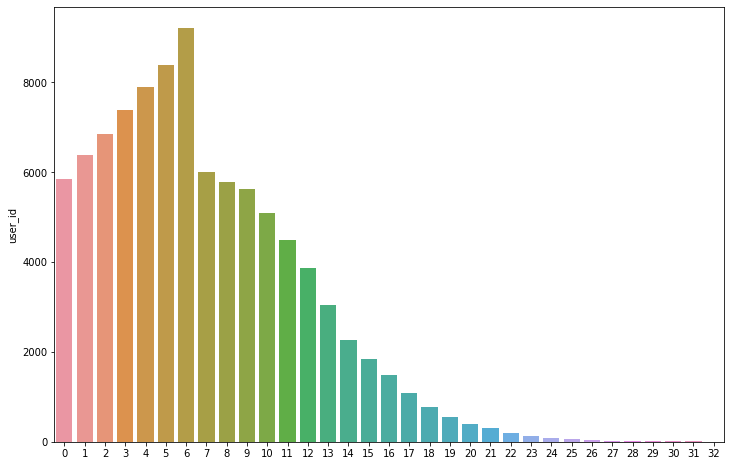

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x=day_players.index, y=day_players['user_id'])
plt.show()

Эта величина нам не даёт четкого понимания был ли человек в игре или нет, т.к. игрок мог быть в игре, но не строить здания

### Сколько в среднем совершается событий игроками?

In [62]:
# будем считать среднее количество событий
game_actions_per_player = game_actions.groupby('date').agg(
    {'user_id': ('count', 'nunique')}).reset_index()
game_actions_per_player.columns = ['date','n_events', 'n_users']
game_actions_per_player['even_per_user'] = (game_actions_per_player['n_events']/game_actions_per_player['n_users'])
game_actions_per_player.head()

,date,n_events,n_users,even_per_user
0,2020-05-04,8171,5860,1.394
1,2020-05-05,9055,6382,1.419
2,2020-05-06,9925,6854,1.448
3,2020-05-07,10858,7384,1.470
4,2020-05-08,12059,7891,1.528


In [63]:
# Оставим в данных только день и месяц:
game_actions_per_player['date'] = game_actions_per_player['date'].dt.strftime('%m-%d')

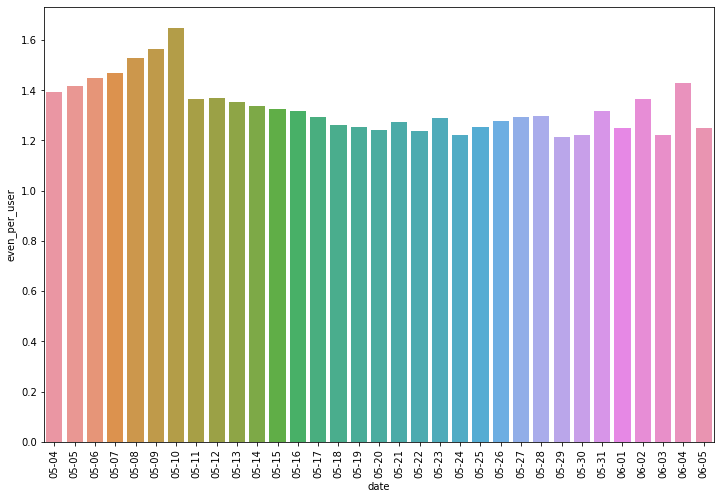

In [64]:
plt.figure(figsize=(12, 8))
sns.barplot(x=game_actions_per_player['date'], y=game_actions_per_player['even_per_user'])
plt.xticks(rotation=90)
plt.show()

In [65]:
print('Среднее количество событий на игрока в день: {:.2f}'.format(game_actions_per_player['even_per_user'].mean()))

Среднее количество событий на игрока в день: 1.33


### Сколько времение в среднем проходит после первого события и завершением первого уровня для каждого игрока?

In [66]:
# для каждого игрока ныйдём время его первого события
start_date = game_actions.groupby('user_id')['event_datetime'].min()
start_date.name = 'start_date'
game_actions = game_actions.join(start_date, on='user_id')
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,date,start_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16


In [67]:
# для каждого игрока ныйдём время его последнего события, завершения первого уровня
end_date = game_actions.groupby('user_id')['event_datetime'].max()
end_date.name = 'end_date'
game_actions = game_actions.join(end_date, on='user_id')
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03,2020-05-15 05:29:13
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-16 11:51:58


In [68]:
# создадим столбец с уникальным числом событий для каждого пользователя:
# и логически будет понятно, 1 - игрок не прошёл первый уровень,
# 2 - прошёл победой и 3- прошёл завершив проект

game_actions['type_finish'] = game_actions.groupby('user_id')['event'].transform('nunique')
game_actions.tail()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,2020-05-07 07:28:50,2020-06-05 02:25:12,2
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,2020-05-07 06:56:28,2020-06-05 08:57:52,1
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2
135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2


Проверим, есть ли игроки, которые завершили проект, но не завершили уровень и другие варианты

In [69]:
game_actions[game_actions['type_finish'] == 3]['event'].value_counts()

building            23601
finished_stage_1     1866
project              1866
Name: event, dtype: int64

In [70]:
game_actions[game_actions['type_finish'] == 2]['event'].value_counts()

building            37185
finished_stage_1     3951
Name: event, dtype: int64

In [71]:
game_actions[game_actions['type_finish'] == 1]['event'].value_counts()

building    67170
Name: event, dtype: int64

Никакх посторонних в наши группы не записал. Нет игроков, завершивших проект, но не закончивших уровень. Как и игроки, не посторившие зданий не построили проект

In [72]:
# сделаем срез тех уникальных пользователей, кто прошёл первый уровень
game_actions_finish = game_actions[
    (game_actions['type_finish'] >= 2) & (game_actions['event'] == 'finished_stage_1')
    ].reset_index()
game_actions_finish.tail()

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
5812,135631,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,2020-06-04,2020-05-04 18:38:25,2020-06-04 15:50:38,2
5813,135632,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04,2020-05-07 02:18:19,2020-06-04 17:56:14,3
5814,135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,2020-05-07 07:28:50,2020-06-05 02:25:12,2
5815,135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2
5816,135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2


In [73]:
# Посчитаем и выведем среднее время для прохождения
game_actions_finish['all_time_game'] = (
    game_actions_finish['end_date'] - game_actions_finish['start_date']
).dt.total_seconds()/3600

print('Среднее время прохождения первого уровня: {:.2f} часов'.format(game_actions_finish['all_time_game'].mean()))

Среднее время прохождения первого уровня: 284.63 часов


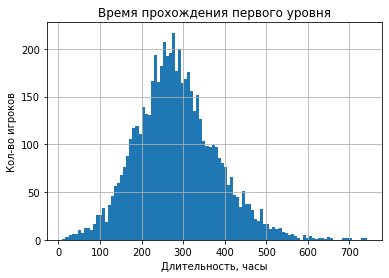

In [74]:
# построим гистрграмму
game_actions_finish['all_time_game'].hist(bins=100)
plt.title('Время прохождения первого уровня')
plt.ylabel('Кол-во игроков')
plt.xlabel('Длительность, часы')
plt.show()

In [75]:
# Посчитаем и выведем среднее время для прохождения
game_actions_finish['days_all_time_game'] = (
    game_actions_finish['end_date'] - game_actions_finish['start_date']
).dt.days

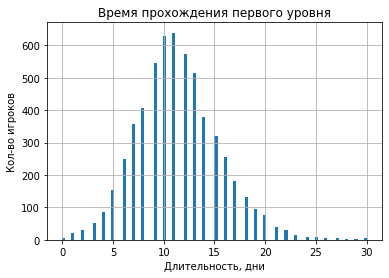

In [76]:
# построим гистрграмму
game_actions_finish['days_all_time_game'].hist(bins=100)
plt.title('Время прохождения первого уровня')
plt.ylabel('Кол-во игроков')
plt.xlabel('Длительность, дни')
plt.show()

In [77]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print('95-й и 99-й перцентили количества дней на пользователя:', np.percentile(
    game_actions_finish['days_all_time_game'], [95, 99])) 

95-й и 99-й перцентили количества дней на пользователя: [18.2 22. ]


In [78]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print('95-й и 99-й перцентили количества часов на пользователя:', np.percentile(
    game_actions_finish['all_time_game'], [95, 99]))

95-й и 99-й перцентили количества часов на пользователя: [455.867      543.73505556]


In [79]:
print('Среднее время прохождения первого уровня: {:.2f} дней'.format(
    game_actions_finish['days_all_time_game'].mean()))

Среднее время прохождения первого уровня: 11.36 дней


**Вывод**

Среднее время прохождения первого уровня: 11.36 дней. 95% игроков укладывается за 18.2 суток (455.8 часов), 99% за 22 дня (543.7 часов)

In [80]:
# сделаем срез тех уникальных пользователей, кто прошёл первый уровень через проект
game_actions_finish_project = game_actions[
    (game_actions['type_finish'] == 3) & (game_actions['event'] == 'finished_stage_1')
    ].reset_index()
game_actions_finish_project.tail()

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
1861,135610,2020-06-02 20:53:20,finished_stage_1,NaN,9df154c3-fb77-4f8a-a281-0457c0b11cec,NaN,2020-06-02,2020-05-05 03:15:52,2020-06-02 20:53:20,3
1862,135612,2020-06-02 23:31:08,finished_stage_1,NaN,9d98001c-7e14-40d7-896e-46b3047365fd,NaN,2020-06-02,2020-05-07 18:38:47,2020-06-02 23:31:08,3
1863,135619,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,2020-06-03,2020-05-09 01:14:45,2020-06-03 14:41:22,3
1864,135628,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,2020-06-04,2020-05-08 09:14:00,2020-06-04 08:03:27,3
1865,135632,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04,2020-05-07 02:18:19,2020-06-04 17:56:14,3


In [81]:
# Посчитаем и выведем среднее время для прохождения
game_actions_finish_project['all_time_game'] = (
    game_actions_finish_project['end_date'] - game_actions_finish_project['start_date']
).dt.total_seconds()/3600

print('Среднее время прохождения первого уровня через проект: {:.2f} часов'.format(
    game_actions_finish_project['all_time_game'].mean()))

Среднее время прохождения первого уровня через проект: 323.01 часов


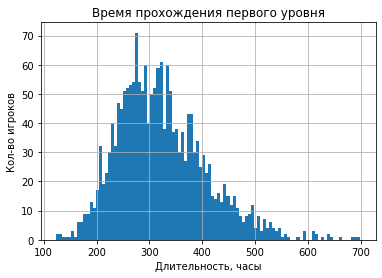

In [82]:
# построим гистрграмму
game_actions_finish_project['all_time_game'].hist(bins=100)
plt.title('Время прохождения первого уровня')
plt.ylabel('Кол-во игроков')
plt.xlabel('Длительность, часы')
plt.show()

In [83]:
# сделаем срез по победе над врагом
game_actions_finish_victory = game_actions[
    (game_actions['type_finish'] == 2) & (game_actions['event'] == 'finished_stage_1')
    ].reset_index()
game_actions_finish_victory.tail()

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
3946,135627,2020-06-04 06:44:02,finished_stage_1,NaN,18fc6a86-00e7-4f3e-96da-bdb6d550415c,NaN,2020-06-04,2020-05-04 08:45:09,2020-06-04 06:44:02,2
3947,135631,2020-06-04 15:50:38,finished_stage_1,NaN,22cce310-fe10-41a2-941b-9c3d63327fea,NaN,2020-06-04,2020-05-04 18:38:25,2020-06-04 15:50:38,2
3948,135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,2020-05-07 07:28:50,2020-06-05 02:25:12,2
3949,135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2
3950,135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2


In [84]:
# Посчитаем и выведем среднее время для прохождения
game_actions_finish_victory['all_time_game'] = (
    game_actions_finish_victory['end_date'] - game_actions_finish_victory['start_date']
).dt.total_seconds()/3600

print('Среднее время прохождения первого уровня через победу над врагом: {:.2f} часов'.format(
    game_actions_finish_victory['all_time_game'].mean()))

Среднее время прохождения первого уровня через победу над врагом: 266.51 часов


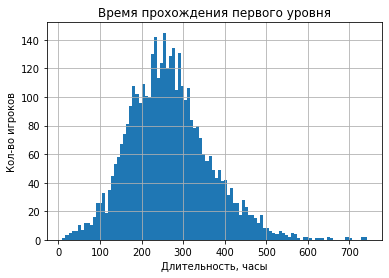

In [85]:
# построим гистрграмму
game_actions_finish_victory['all_time_game'].hist(bins=100)
plt.title('Время прохождения первого уровня')
plt.ylabel('Кол-во игроков')
plt.xlabel('Длительность, часы')
plt.show()

**Вывод:**
- Среднее время прохождения первого уровня через проект: 323.01 часов
- Среднее время прохождения первого уровня через победу над врагом: 266.51 часов
- Среднее время прохождения первого уровня: 284.63 часов

Разница в стратегии приносит плоды, игроки побеждающие врага в среднем тратят на 50 часов меньше времения для прохождения первого уровня.

### Сколько раз в среднем игркои строят каждое здание(assembly_shop, spaceport, research_center) до завершения первого уровня в целом, методом project и победой над другим игроком?

In [86]:
# сделаем срез по тем игрокам, которые в принципе смогли пройти первый уровень
game_actions_finish_new = game_actions[game_actions['type_finish'] >= 2]
game_actions_finish_new.tail()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
135633,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-04,2020-05-07 07:28:50,2020-06-05 02:25:12,2
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,2020-05-07 07:28:50,2020-06-05 02:25:12,2
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2
135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2


In [87]:
# создам сводную и посчитаем для каждого игрока и типа здания их количество
# т.к. мы не заполнили пропуски в building_type, события finish и project не должны будут считаться
game_actions_finish_new_pivot = game_actions_finish_new.pivot_table(index=['user_id'],
                                                                    columns='building_type',
                                                                    values='event',
                                                                    aggfunc='count').reset_index()
game_actions_finish_new_pivot

building_type,user_id,assembly_shop,research_center,spaceport
0,001d39dc-366c-4021-9604-6a3b9ff01e25,4.000,nan,4.000
1,003ee7e8-6356-4286-a715-62f22a18d2a1,4.000,1.000,3.000
2,004074f8-251a-4776-922c-8348dca1a2f6,6.000,2.000,4.000
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,4.000,nan,4.000
4,0056c007-c082-43cc-bdef-afc49bca4cb9,1.000,nan,2.000
...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,1.000,nan,6.000
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,7.000,nan,9.000
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,7.000,1.000,1.000
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,4.000,2.000,3.000


In [88]:
print('Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень: {:.1f} шт.'.format(
    game_actions_finish_new_pivot['assembly_shop'].mean()))
print('Среднее кол-во зданий research_center для игроков, прошедших первый уровень: {:.1f} шт.'.format(
    game_actions_finish_new_pivot['research_center'].mean()))
print('Среднее кол-во зданий spaceport для игроков, прошедших первый уровень: {:.1f} шт.'.format(
    game_actions_finish_new_pivot['spaceport'].mean()))

Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень: 4.4 шт.
Среднее кол-во зданий research_center для игроков, прошедших первый уровень: 1.8 шт.
Среднее кол-во зданий spaceport для игроков, прошедших первый уровень: 4.8 шт.


In [89]:
# сделаем срез по тем игрокам, которые смогли пройти первый уровень через проект
game_actions_finish_project_new = game_actions[game_actions['type_finish'] == 3]
game_actions_finish_project_new.tail()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
135619,2020-06-03 14:41:22,finished_stage_1,NaN,82e46f34-e243-4728-8e20-2e171fc33ea4,NaN,2020-06-03,2020-05-09 01:14:45,2020-06-03 14:41:22,3
135626,2020-06-04 05:18:54,building,research_center,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04,2020-05-07 02:18:19,2020-06-04 17:56:14,3
135628,2020-06-04 08:03:27,finished_stage_1,NaN,fe032991-71e0-48c5-889f-4c3805ba4c9b,NaN,2020-06-04,2020-05-08 09:14:00,2020-06-04 08:03:27,3
135629,2020-06-04 08:29:42,project,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,satellite_orbital_assembly,2020-06-04,2020-05-07 02:18:19,2020-06-04 17:56:14,3
135632,2020-06-04 17:56:14,finished_stage_1,NaN,d477dde8-7c22-4f23-9c4f-4ec31a1aa4c8,NaN,2020-06-04,2020-05-07 02:18:19,2020-06-04 17:56:14,3


In [90]:
# создам сводную и посчитаем для каждого игрока и типа здания их количество
# т.к. мы не заполнили пропуски в building_type, события finish и project не должны будут считаться
game_actions_finish_project_new_pivot = game_actions_finish_project_new.pivot_table(index=['user_id'],
                                                                    columns='building_type',
                                                                    values='event',
                                                                    aggfunc='count').reset_index()
game_actions_finish_project_new_pivot

building_type,user_id,assembly_shop,research_center,spaceport
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,7,2,2
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2,2,8
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,6,2,3
3,00de2809-403e-4476-a2f7-ca1b11700190,7,2,4
4,00e83261-5fd4-4939-9616-802b5a0202c6,1,2,10
...,...,...,...,...
1861,ff50f63a-c4b3-494e-8bf9-3f19dbfc513e,6,2,10
1862,ff60fcd1-4329-494e-b82d-461fbdf5b5eb,7,1,3
1863,ff83bdd8-f49a-49fd-8aad-9fa1fb30d516,5,1,7
1864,ff841992-d93b-462e-bc6e-18c24a514f36,6,5,9


In [91]:
print('Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень через проект: {:.1f} шт.'.format(
    game_actions_finish_project_new_pivot['assembly_shop'].mean()))
print('Среднее кол-во зданий research_center для игроков, прошедших первый уровень через проект: {:.1f} шт.'.format(
    game_actions_finish_project_new_pivot['research_center'].mean()))
print('Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через проект: {:.1f} шт.'.format(
    game_actions_finish_project_new_pivot['spaceport'].mean()))

Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень через проект: 4.9 шт.
Среднее кол-во зданий research_center для игроков, прошедших первый уровень через проект: 2.0 шт.
Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через проект: 5.8 шт.


In [92]:
# сделаем срез по тем игрокам, которые смогли пройти первый уровень через победу над врагом
game_actions_finish_victory_new = game_actions[game_actions['type_finish'] == 2]
game_actions_finish_victory_new.tail()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
135633,2020-06-04 18:14:33,building,research_center,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-04,2020-05-07 07:28:50,2020-06-05 02:25:12,2
135634,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2
135635,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN,2020-06-05,2020-05-07 07:28:50,2020-06-05 02:25:12,2
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2
135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2


In [93]:
# создам сводную и посчитаем для каждого игрока и типа здания их количество
# т.к. мы не заполнили пропуски в building_type, события finish и project не должны будут считаться
game_actions_finish_victory_new_pivot = game_actions_finish_victory_new.pivot_table(index=['user_id'],
                                                                    columns='building_type',
                                                                    values='event',
                                                                    aggfunc='count').reset_index()
game_actions_finish_victory_new_pivot

building_type,user_id,assembly_shop,research_center,spaceport
0,001d39dc-366c-4021-9604-6a3b9ff01e25,4.000,nan,4.000
1,003ee7e8-6356-4286-a715-62f22a18d2a1,4.000,1.000,3.000
2,004074f8-251a-4776-922c-8348dca1a2f6,6.000,2.000,4.000
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,4.000,nan,4.000
4,0056c007-c082-43cc-bdef-afc49bca4cb9,1.000,nan,2.000
...,...,...,...,...
3946,ffc6f4fa-3476-47af-85cb-e2ee0551110a,4.000,1.000,8.000
3947,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,1.000,nan,6.000
3948,ffe810f4-1a1f-464b-924d-6f120b0cb8df,7.000,nan,9.000
3949,ffef4fed-164c-40e1-bde1-3980f76d0fb5,7.000,1.000,1.000


In [94]:
print('Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень через победу: {:.1f} шт.'.format(
    game_actions_finish_victory_new_pivot['assembly_shop'].mean()))
print('Среднее кол-во зданий research_center для игроков, прошедших первый уровень через победу: {:.1f} шт.'.format(
    game_actions_finish_victory_new_pivot['research_center'].mean()))
print('Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через победу: {:.1f} шт.'.format(
    game_actions_finish_victory_new_pivot['spaceport'].mean()))

Среднее кол-во зданий assembly_shop для игроков, прошедших первый уровень через победу: 4.1 шт.
Среднее кол-во зданий research_center для игроков, прошедших первый уровень через победу: 1.6 шт.
Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через победу: 4.4 шт.


In [95]:
# сделаем срез по тем игрокам, которые не прошли игру
game_actions_finish_loser_new = game_actions[game_actions['type_finish'] == 1]
game_actions_finish_loser_new.tail()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish
135593,2020-06-01 16:09:44,building,spaceport,b81fdba1-a168-4c2a-b41d-6a62ca92bec9,NaN,2020-06-01,2020-05-07 06:05:13,2020-06-01 16:09:44,1
135597,2020-06-01 21:30:47,building,spaceport,7beb74ff-c5cf-4dfd-a0e6-2685ceddb8ae,NaN,2020-06-01,2020-05-06 21:39:26,2020-06-01 21:30:47,1
135603,2020-06-02 08:26:32,building,research_center,70e18c96-221c-4ccc-8b5e-45adc4b7e1a2,NaN,2020-06-02,2020-05-06 19:26:01,2020-06-02 08:26:32,1
135611,2020-06-02 21:37:17,building,spaceport,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-02,2020-05-07 06:56:28,2020-06-05 08:57:52,1
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,2020-05-07 06:56:28,2020-06-05 08:57:52,1


In [96]:
# создам сводную и посчитаем для каждого игрока и типа здания их количество
# т.к. мы не заполнили пропуски в building_type, события finish и project не должны будут считаться
game_actions_finish_loser_new_pivot = game_actions_finish_loser_new.pivot_table(index=['user_id'],
                                                                    columns='building_type',
                                                                    values='event',
                                                                    aggfunc='count').reset_index()
game_actions_finish_loser_new_pivot

building_type,user_id,assembly_shop,research_center,spaceport
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,6.000,1.000,6.000
1,00151b4f-ba38-44a8-a650-d7cf130a0105,4.000,nan,5.000
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2.000,nan,2.000
3,002f508f-67b6-479f-814b-b05f00d4e995,3.000,1.000,8.000
4,003b80c6-4164-4157-bb2a-03d0181d39c4,5.000,nan,9.000
...,...,...,...,...
7754,ffbd2858-ded0-487a-be48-723044a1a742,2.000,2.000,9.000
7755,ffcf62ae-0992-47ea-a010-2667ee0e7f23,4.000,1.000,5.000
7756,ffd3469d-fb9e-49d8-84fe-c1a1aaf4b3b7,7.000,nan,4.000
7757,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,5.000,3.000,8.000


In [97]:
print('Среднее кол-во зданий assembly_shop для игроков, не прошедших игру: {:.1f} шт.'.format(
    game_actions_finish_loser_new_pivot['assembly_shop'].mean()))
print('Среднее кол-во зданий research_center для игроков, прошедших первый уровень через победу: {:.1f} шт.'.format(
    game_actions_finish_loser_new_pivot['research_center'].mean()))
print('Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через победу: {:.1f} шт.'.format(
    game_actions_finish_loser_new_pivot['spaceport'].mean()))

Среднее кол-во зданий assembly_shop для игроков, не прошедших игру: 3.7 шт.
Среднее кол-во зданий research_center для игроков, прошедших первый уровень через победу: 1.9 шт.
Среднее кол-во зданий spaceport для игроков, прошедших первый уровень через победу: 4.2 шт.


In [98]:
df = game_actions_finish_loser_new_pivot[
    ['assembly_shop', 'research_center', 'spaceport']
    ].mean().reset_index().rename(columns={0:'mean_loser'})
df

,building_type,mean_loser
0,assembly_shop,3.748
1,research_center,1.930
2,spaceport,4.204


In [99]:
df_1 = game_actions_finish_project_new_pivot[
    ['assembly_shop', 'research_center', 'spaceport']
    ].mean().reset_index().rename(columns={0:'mean_project'})

df_2 = game_actions_finish_victory_new_pivot[
    ['assembly_shop', 'research_center', 'spaceport']
    ].mean().reset_index().rename(columns={0:'mean_victory'})

df_3 = game_actions_finish_new_pivot[
    ['assembly_shop', 'research_center', 'spaceport']
    ].mean().reset_index().rename(columns={0:'mean_finish'})

df['mean_project'] = df_1['mean_project']
df['mean_victory'] = df_2['mean_victory']
df['mean_finish'] = df_3['mean_finish']
df

,building_type,mean_loser,mean_project,mean_victory,mean_finish
0,assembly_shop,3.748,4.885,4.125,4.369
1,research_center,1.930,1.981,1.603,1.771
2,spaceport,4.204,5.781,4.400,4.847


In [100]:
# добавим столбец, чтобы узнать, на сколько больше стоит ожидать показов для проектировщиков относительно воителей
# по формуле (В-А)/А*100
df['per_victory_project_%'] = (df['mean_project'] - df['mean_victory']) / df['mean_victory'] * 100


In [101]:
# добавим столбец, чтобы узнать, на сколько больше стоит ожидать показов для воителей относительно непрошедших уровень
# по формуле (В-А)/А*100
df['per_victory_loser_%'] = (df['mean_victory'] - df['mean_loser']) / df['mean_loser'] * 100
df

,building_type,mean_loser,mean_project,mean_victory,mean_finish,per_victory_project_%,per_victory_loser_%
0,assembly_shop,3.748,4.885,4.125,4.369,18.431,10.062
1,research_center,1.930,1.981,1.603,1.771,23.570,-16.943
2,spaceport,4.204,5.781,4.400,4.847,31.407,4.663


In [102]:
print('Средний процент в разнице между проектировщиками и воителями: {:.2f}%'.format(
    df['per_victory_project_%'].mean()))

print('Средний процент в разнице между воителями и непрошедшими: {:.2f}%'.format(
    df['per_victory_loser_%'].mean()))

Средний процент в разнице между проектировщиками и воителями: 24.47%
Средний процент в разнице между воителями и непрошедшими: -0.74%


### Выводы

Среднее количество событий на игрока в день: 1.33

Среднее время прохождения первого уровня: 11.36 дней. 95% игроков укладывается за 18.2 суток (455.8 часов), 99% за 22 дня (543.7 часов)

- Среднее время прохождения первого уровня через проект: 323.01 часов
- Среднее время прохождения первого уровня через победу над врагом: 266.51 часов
- Среднее время прохождения первого уровня: 284.63 часов

Разница в стратегии приносит плоды, игроки побеждающие врага в среднем тратят на 50 часов меньше времения для прохождения первого уровня.

Собрали наши результаты аккуратно в табличку

| building_type |	mean_loser |	mean_project |	mean_victory | mean_finish | per_victory_project_% | per_victory_loser_% |
|---------------|--------------|-----------------|---------------|-------------|-----------------------|---|
| assembly_shop |	3.748 |	4.885 |	4.125 |	4.369 | 18.4% | 10% |
| research_center |	1.930 |	1.981 |	1.603 |	1.771 | 23.5% | -16.9% |
| spaceport |	4.204 |	5.781 |	4.400 |	4.847 | 31.4% | 4.6% |


Чтобы пройти уровень, судя по не целому среднему в mean_finish некоторым игрокам достаточно *assembly_shop* - 4, *research_center* - 1 и *spaceport* - 4. Мы уже знаем, что все игроки стартуют с *assembly_shop* как стартового здания. Игроки, предпочитающие войну, строят все типы зданий в меньшей степени. Игроки, играющие через проект, строят соответственно больше зданий каждого типа. 

При показе рекламы "проектировщики" будут чаще смотреть рекламу, и в итоге больше приносить прибыли. Ожидаемая разница около 24%, большая разница. Но при этом не стоит ожидать, что при прохождении первого уровня воители будут смотреть рекламу чаще, чем игроки не прошедшие его. Разница между ними около нуля

## Проверьте статистические гипотезы

### Проверьте гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

Наше распределение близко к нормальному

In [103]:
# повторим и сделаем срез по проекту
group_project_finish = game_actions[
    (game_actions['type_finish'] == 3) & (game_actions['event'] == 'finished_stage_1')
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_project = (
    group_project_finish['end_date'] - group_project_finish['start_date']
).dt.total_seconds()/3600

group_project.tail()

1861   689.624
1862   628.872
1863   613.444
1864   646.824
1865   687.632
dtype: float64

In [104]:
print('Среднее затраченное время при проекте: {:.2f} часов'.format(group_project.mean()))

Среднее затраченное время при проекте: 323.01 часов


In [105]:
# повторим и сделаем срез по победе над врагом
group_victory_finish = game_actions[
    (game_actions['type_finish'] == 2) & (game_actions['event'] == 'finished_stage_1')
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_victory = (
    group_victory_finish['end_date'] - group_victory_finish['start_date']
).dt.total_seconds()/3600

group_victory.tail()

3946   741.981
3947   741.204
3948   690.939
3949   702.478
3950   729.607
dtype: float64

In [106]:
print('Среднее затраченное время при победе: {:.2f} часов'.format(group_victory.mean()))

Среднее затраченное время при победе: 266.51 часов


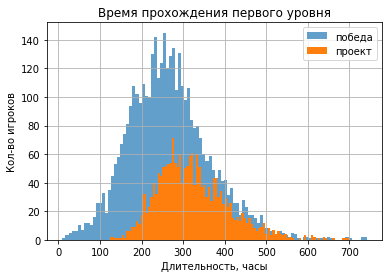

In [107]:
# построим гистрграмму для обоих групп
group_victory.hist(bins=100, alpha=0.7, label='победа')
group_project.hist(bins=100, label='проект')
plt.title('Время прохождения первого уровня')
plt.ylabel('Кол-во игроков')
plt.xlabel('Длительность, часы')
plt.legend(loc='upper right')
plt.show()

Так же распределение похоже на нормальное. К данным группам можно применить t-test о равенстве двух средних

In [108]:
# проверим гипотезу о равенстве среднего количества времени для каждого игрока в выборках

alpha = 0.05

results = st.ttest_ind(group_project, group_victory)


print('p-значение: {0:.8f}'.format(results.pvalue)) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Среднее затраченное время при победе: {:.2f} часов'.format(group_victory.mean()))
print('Среднее затраченное время при проекте: {:.2f} часов'.format(group_project.mean()))

p-значение: 0.00000000
Отвергаем нулевую гипотезу
Среднее затраченное время при победе: 266.51 часов
Среднее затраченное время при проекте: 323.01 часов


Как показывает статистический тест, среднее время прохождения первого уровня между игроками (проект и победа) не равны

### Проверьте гипотезу о равенстве количеста построек в первые сто часов игры для игроков, прошедших первый уровень, через проект и победой над врагом

Мы определили, что игроки с разной тактикой различаются в среднем времени прохождения уровня. Даже стат тест говорит, что вряд ли это случайно. Ранее мы считали, что среднее количество зданий при заверешении уровня для игроков отличается. Проверим это статистическим тестом. Но мало это сделать уже когда игроки прошли уровень, нам ведь необходимо планировать показа рекламы и желательно знать заранее, какой тактикой пользуются игроки, на что делают упор. Брать сильно ранний период не стоит, так как мы ранее увидели на графиках, что все дружно и массово строят *assebly_shop* и различия начнут появлятся не сразу. В идеале сделать несколько тестов с уменьшением временного периода.

In [109]:
# прибавим нужный нам период в сто часов к старту игрока 
game_actions['need_time'] = game_actions['start_date'] + pd.to_timedelta('100:00:00')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01,1,2020-05-08 04:00:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03,2020-05-15 05:29:13,3,2020-05-08 04:00:03
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-16 11:51:58,2,2020-05-08 04:00:16
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-12 04:29:54,1,2020-05-08 04:00:16
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,2020-05-04 00:00:35,2020-05-11 14:18:05,2,2020-05-08 04:00:35


In [110]:
# сделаем срез по событиям, чтобы они произошли ранее, чем через 100 часов от начала игры
game_actions_100_hours_period = (
    game_actions[game_actions['event_datetime'] < game_actions['need_time']]
    ).reset_index()
game_actions_100_hours_period.tail()

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time
58833,108025,2020-05-14 20:38:10,building,spaceport,4eae4aa5-a924-48ed-8279-bb9d2df72e39,NaN,2020-05-14,2020-05-10 17:25:52,2020-05-25 10:54:10,1,2020-05-14 21:25:52
58834,108028,2020-05-14 20:38:46,building,spaceport,dbb6fea3-3d89-4353-9f9b-59fbfd318747,NaN,2020-05-14,2020-05-10 19:07:25,2020-05-18 16:53:02,1,2020-05-14 23:07:25
58835,108198,2020-05-14 21:13:45,building,spaceport,f6e84d15-5b57-482b-9c72-57835e383042,NaN,2020-05-14,2020-05-10 18:55:59,2020-05-20 18:02:52,2,2020-05-14 22:55:59
58836,108412,2020-05-14 22:02:05,building,spaceport,6cfebea9-7323-4c79-ab2a-c7aa60a997de,NaN,2020-05-14,2020-05-10 19:18:06,2020-05-21 20:22:32,2,2020-05-14 23:18:06
58837,108547,2020-05-14 22:29:48,building,spaceport,cdfe4630-87e3-4960-b90f-34d0bd73fe6a,NaN,2020-05-14,2020-05-10 21:28:58,2020-05-17 16:57:54,1,2020-05-15 01:28:58


In [111]:
# повторим и сделаем срез по победе над врагом
group_victory_finish_2_test = game_actions_100_hours_period[
    (game_actions_100_hours_period['type_finish'] == 2)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_victory_2_test = group_victory_finish_2_test.groupby('user_id')['building_type'].count()

group_victory_2_test

user_id
001d39dc-366c-4021-9604-6a3b9ff01e25    7
003ee7e8-6356-4286-a715-62f22a18d2a1    4
004074f8-251a-4776-922c-8348dca1a2f6    3
00464e5e-28ed-4be6-bf44-517ef7b3937b    4
0056c007-c082-43cc-bdef-afc49bca4cb9    2
                                       ..
ffc6f4fa-3476-47af-85cb-e2ee0551110a    6
ffd002f3-3545-423e-8dba-0c6a2d48a3aa    3
ffe810f4-1a1f-464b-924d-6f120b0cb8df    8
ffef4fed-164c-40e1-bde1-3980f76d0fb5    6
fffb626c-5ab6-47c9-8113-2062a2f18494    3
Name: building_type, Length: 3951, dtype: int64

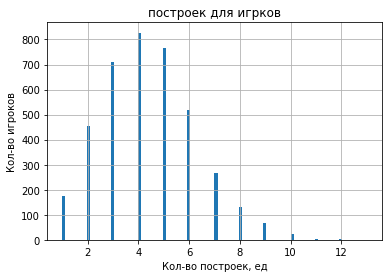

In [112]:
# построим гистрграмму
group_victory_2_test.hist(bins=100)
plt.title('построек для игрков')
plt.ylabel('Кол-во игроков')
plt.xlabel('Кол-во построек, ед')
plt.show()

График напоминает нормальное распределение

In [113]:
# повторим и сделаем срез по проекту
group_project_finish_2_test = game_actions_100_hours_period[
    (game_actions_100_hours_period['type_finish'] == 3)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_project_2_test = group_project_finish_2_test.groupby('user_id')['building_type'].count()

group_project_2_test

user_id
006380d6-67a6-45de-ab1e-6eb54ad8dbe8    5
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82    5
00c2b9f2-2615-439c-aed0-6974e4c6c1c1    6
00de2809-403e-4476-a2f7-ca1b11700190    5
00e83261-5fd4-4939-9616-802b5a0202c6    3
                                       ..
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e    4
ff60fcd1-4329-494e-b82d-461fbdf5b5eb    5
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516    6
ff841992-d93b-462e-bc6e-18c24a514f36    7
ffff69cc-fec1-4fd3-9f98-93be1112a6b8    4
Name: building_type, Length: 1866, dtype: int64

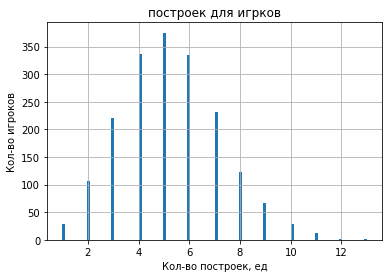

In [114]:
# построим гистрграмму
group_project_2_test.hist(bins=100)
plt.title('построек для игрков')
plt.ylabel('Кол-во игроков')
plt.xlabel('Кол-во построек, ед')
plt.show()

График очень красив и нормально распределён

Мы получили две группы для игроков с прохождением уровня по победе над врагом и строительством проекта. Задали временной период в 100 часов от начала первого события для каждого игрока и посчитали кол-во построек для каждого за этот период. Получив графики с нормальным распределением мы можем использовать t-test стьюдента. 

**Нулевая гипотеза: среднее количество зданий для игроков завершивших первый уровень через проект и победу равно**

In [115]:
# проверим гипотезу о равенстве среднего количества зданий для каждого игрока в выборках

alpha = 0.05

results = st.ttest_ind(group_victory_2_test, group_project_2_test)


print('p-значение: {0:.80f}'.format(results.pvalue)) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000000000000000000000000000000000000000000000000000100102640684500110611315287
Отвергаем нулевую гипотезу


In [116]:
print('Среднее кол-во зданий для игроков за первые сто часов игры, завершивших проект: {:.1f} шт.'.format(
    group_project_2_test.mean()))
print('Среднее кол-во зданий для игроков за первые сто часов игры, одержавших победу: {:.1f} шт.'.format(
    group_victory_2_test.mean()))

Среднее кол-во зданий для игроков за первые сто часов игры, завершивших проект: 5.2 шт.
Среднее кол-во зданий для игроков за первые сто часов игры, одержавших победу: 4.4 шт.


**Вывод**

Как показали статистические тесты, игроки, играющие через проект затрачивают в среднем больше времени на прохождение первого уровня, чем игроки, играющие на победу над врагом. 266.5 часов против 323 часов. Более того, уже в первые сто часов игры между игроками начинают появлятся различия. Играющие на победу строят в среднем 4.4 здания, против игроков проекта 5.2 домика. Саму игру не знаю, но видимо больше ресурсов тратися на армию

### Среднее число зданий игроков за первые сто часов игры, не прошедших уровень. Проверьте гипотезу о равенстве зданий победителей врагов и не прошедших уровень за первые 100 часов игры

Повторим для непрошедших

In [117]:
# повторим и сделаем срез по проекту
group_loser_2_test = game_actions_100_hours_period[
    (game_actions_100_hours_period['type_finish'] == 1)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_loser_2_test = group_loser_2_test.groupby('user_id')['building_type'].count()

print('Среднее кол-во зданий для игроков за первые сто часов игры, не прошедших уровень: {:.1f} шт.'.format(
    group_loser_2_test.mean()))

Среднее кол-во зданий для игроков за первые сто часов игры, не прошедших уровень: 4.1 шт.


In [118]:
# проверим гипотезу о равенстве среднего количества зданий для каждого игрока
# в выборках (не прошедших уровень и одержавших победу)
alpha = 0.05

results = st.ttest_ind(group_victory_2_test, group_loser_2_test)


print('p-значение: {0:.80f}'.format(results.pvalue)) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000000000000000566303493871923769991801294958797720581740277727444445032833897
Отвергаем нулевую гипотезу


#### Тест для периода в первые 80 часов

In [119]:
# сделаем срез по событиям, чтобы они произошли ранее, чем через 80 часов от начала игры
game_actions_80_hours_period = (
    game_actions[game_actions['event_datetime'] < (game_actions['need_time'] - pd.to_timedelta('20:00:00'))]
    ).reset_index()
game_actions_80_hours_period.tail(3)

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time
48801,102334,2020-05-14 00:37:05,building,spaceport,86379e96-8e7c-45ac-bbca-78add6594d2b,NaN,2020-05-14,2020-05-10 20:31:10,2020-05-19 17:24:12,1,2020-05-15 00:31:10
48802,103431,2020-05-14 04:19:52,building,spaceport,2f800faf-e3bc-4cbe-a83a-006d266e5f31,NaN,2020-05-14,2020-05-10 22:59:37,2020-05-14 04:19:52,1,2020-05-15 02:59:37
48803,103787,2020-05-14 05:36:30,building,spaceport,0d37a895-ee0f-4e36-aadb-880cef670f0b,NaN,2020-05-14,2020-05-10 23:20:44,2020-05-26 15:15:19,2,2020-05-15 03:20:44


In [120]:
# повторим и сделаем срез по победе над врагом
group_victory_finish_3_test = game_actions_80_hours_period[
    (game_actions_80_hours_period['type_finish'] == 2)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_victory_3_test = group_victory_finish_3_test.groupby('user_id')['building_type'].count()

group_victory_3_test

user_id
001d39dc-366c-4021-9604-6a3b9ff01e25    6
003ee7e8-6356-4286-a715-62f22a18d2a1    4
004074f8-251a-4776-922c-8348dca1a2f6    3
00464e5e-28ed-4be6-bf44-517ef7b3937b    3
0056c007-c082-43cc-bdef-afc49bca4cb9    2
                                       ..
ffc6f4fa-3476-47af-85cb-e2ee0551110a    3
ffd002f3-3545-423e-8dba-0c6a2d48a3aa    3
ffe810f4-1a1f-464b-924d-6f120b0cb8df    8
ffef4fed-164c-40e1-bde1-3980f76d0fb5    5
fffb626c-5ab6-47c9-8113-2062a2f18494    2
Name: building_type, Length: 3951, dtype: int64

In [121]:
# повторим и сделаем срез по проекту
group_project_finish_3_test = game_actions_80_hours_period[
    (game_actions_80_hours_period['type_finish'] == 3)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_project_3_test = group_project_finish_3_test.groupby('user_id')['building_type'].count()

group_project_3_test

user_id
006380d6-67a6-45de-ab1e-6eb54ad8dbe8    5
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82    5
00c2b9f2-2615-439c-aed0-6974e4c6c1c1    6
00de2809-403e-4476-a2f7-ca1b11700190    5
00e83261-5fd4-4939-9616-802b5a0202c6    1
                                       ..
ff50f63a-c4b3-494e-8bf9-3f19dbfc513e    4
ff60fcd1-4329-494e-b82d-461fbdf5b5eb    5
ff83bdd8-f49a-49fd-8aad-9fa1fb30d516    6
ff841992-d93b-462e-bc6e-18c24a514f36    7
ffff69cc-fec1-4fd3-9f98-93be1112a6b8    4
Name: building_type, Length: 1866, dtype: int64

In [122]:
# проверим гипотезу о равенстве среднего количества зданий для каждого игрока
# в выборках (не прошедших уровень и одержавших победу)
alpha = 0.05

results = st.ttest_ind(group_victory_3_test, group_project_3_test)


print('p-значение: {0:.80f}'.format(results.pvalue)) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00000000000000000000000000000000000170386538443134588403333026202222273834389196
Отвергаем нулевую гипотезу


Начинают появлятся какие то цифры

#### Первые 4 часа

In [123]:
# сделаем срез по событиям, чтобы они произошли ранее, чем через 50 часов от начала игры
game_actions_4_hours_period = (
    game_actions[game_actions['event_datetime'] < (game_actions['need_time'] - pd.to_timedelta('97:30:00'))]
    ).reset_index()
game_actions_4_hours_period.tail(3)

,index,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time
14607,78234,2020-05-10 23:44:17,building,assembly_shop,7b225969-375a-455e-a14a-ed1ab373fb65,NaN,2020-05-10,2020-05-10 23:44:17,2020-05-24 15:22:56,1,2020-05-15 03:44:17
14608,78385,2020-05-10 23:57:56,building,assembly_shop,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-10,2020-05-10 23:57:56,2020-05-18 00:23:28,1,2020-05-15 03:57:56
14609,78400,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-10,2020-05-10 23:59:52,2020-05-18 11:11:11,1,2020-05-15 03:59:52


In [124]:
# повторим и сделаем срез по победе над врагом
group_victory_finish_4_test = game_actions_4_hours_period[
    (game_actions_4_hours_period['type_finish'] == 2)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_victory_4_test = group_victory_finish_4_test.groupby('user_id')['building_type'].count()

# повторим и сделаем срез по проекту
group_project_finish_4_test = game_actions_4_hours_period[
    (game_actions_4_hours_period['type_finish'] == 3)
    ].reset_index()

# создадим список количества затраченного времени в часах для большей точности
group_project_4_test = group_project_finish_4_test.groupby('user_id')['building_type'].count()

In [125]:
# проверим гипотезу о равенстве среднего количества зданий для каждого игрока
# в выборках (не прошедших уровень и одержавших победу)
alpha = 0.05

results = st.ttest_ind(group_victory_4_test, group_project_4_test)


print('p-значение: {0:.80f}'.format(results.pvalue)) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Среднее кол-во зданий для игроков за первые 3,5 часа игры, завершивших проект: {:.2f} шт.'.format(
    group_project_4_test.mean()))
print('Среднее кол-во зданий для игроков за первые 3,5 часа игры, одержавших победу: {:.2f} шт.'.format(
    group_victory_4_test.mean()))

p-значение: 0.03499244965238997029377543412920203991234302520751953125000000000000000000000000
Отвергаем нулевую гипотезу
Среднее кол-во зданий для игроков за первые 3,5 часа игры, завершивших проект: 1.10 шт.
Среднее кол-во зданий для игроков за первые 3,5 часа игры, одержавших победу: 1.08 шт.


Наш тест обнаружил, что уже через 3 с половиной часа игры в среднем кол-ве зданий для игроков с разными тактиками начинают появлятся значимые отличия

## Расчитайте окупаемость

У нас нет информации, сколько стоит размещение рекламы в игре, как часто игроки кликают на неё, сколько она нам будет приносить. Попробуем предсказать окупаемость игры, расчитаем DAU, retention. Их можно рассчитать, потому что мы планируем показ рекламы при строительстве, а наличие события косвенно нам сообщает, заходил ли игрок в это окно и сможет ли увидеть рекламу. Если он совершает действия, это говорит о его заинтересованности в данный момент в игре.

### Расчитаем DAU

In [126]:
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04 00:00:01,2020-05-10 20:27:01,1,2020-05-08 04:00:01
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,2020-05-04 00:00:03,2020-05-15 05:29:13,3,2020-05-08 04:00:03
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,2020-05-04 00:00:16,2020-05-16 11:51:58,2,2020-05-08 04:00:16


In [127]:
dau_total_project = game_actions[game_actions['type_finish'] == 3].groupby('date').agg({'user_id':'nunique'}).reset_index()
dau_total_victory = game_actions_finish_victory_new.groupby('date').agg({'user_id':'nunique'}).reset_index()
dau_total = game_actions.groupby('date').agg({'user_id':'nunique'}).reset_index()

print("среднее значение DAU для проектировщиков: {:.2f}".format(dau_total_project['user_id'].mean()))
print("среднее значение DAU для воителей: {:.2f}".format(dau_total_victory['user_id'].mean()))
print("среднее значение DAU для всех: {:.2f}".format(dau_total['user_id'].mean()))

среднее значение DAU для проектировщиков: 561.88
среднее значение DAU для воителей: 872.91
среднее значение DAU для всех: 2884.88


### Расчитаем retention RATE (коэфициент удержания)

In [128]:
# Следующим шагом выделим из столбцов start_date недели.
# из event_datetime мы сделали это ранее
# Вызовем метод astype(): преобразуем значения столбцов к типу 'datetime64[W]'. 
# [W] в типе datetime64 означает размерность временной метки, в этом случае — день:

game_actions['first_event_day'] = game_actions['start_date'].astype(
    'datetime64[D]'
)

game_actions.tail(3)

,event_datetime,event,building_type,user_id,project_type,date,start_date,end_date,type_finish,need_time,first_event_day
135636,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN,2020-06-05,2020-05-07 06:56:28,2020-06-05 08:57:52,1,2020-05-11 10:56:28,2020-05-07
135637,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN,2020-06-05,2020-05-07 05:43:45,2020-06-05 12:12:27,2,2020-05-11 09:43:45,2020-05-07
135638,2020-06-05 12:32:49,finished_stage_1,NaN,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN,2020-06-05,2020-05-06 02:56:25,2020-06-05 12:32:49,2,2020-05-10 06:56:25,2020-05-06


In [129]:
# Получим день начала недели, за которую произошло событие. Он станет идентификатором недели.
# Параметр unit метода pd.to_timedelta задаёт единицу измерения — в нашем случае дня: unit='d'. 
# Вычтем из даты порядковый номер дня: 

game_actions['activity_week'] = pd.to_datetime(
    game_actions['date'], unit='d'
) - pd.to_timedelta(game_actions['date'].dt.dayofweek, unit='d')
game_actions['first_activity_week'] = pd.to_datetime(
    game_actions['first_event_day'], unit='d'
) - pd.to_timedelta(
    game_actions['first_event_day'].dt.dayofweek, unit='d'
) 

In [130]:
# Параметр unit не влияет на данные, где есть только дата, но если есть время — поможет в обработке. 
# Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты.
# В качестве делителя обратимся к константе np.timedelta64(1,'W') (где 'W' от англ. week, «неделя»): 

game_actions['cohort_lifetime'] = (
    game_actions['activity_week'] - game_actions['first_activity_week']
)
game_actions['cohort_lifetime'] = game_actions[
    'cohort_lifetime'
] / np.timedelta64(1, 'W')
game_actions['cohort_lifetime'] = game_actions['cohort_lifetime'].astype(
    'int'
) 

In [131]:
# Сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных
# пользователей на определённый «день жизни»:

cohorts = game_actions.groupby(['first_activity_week',
                                'cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

In [132]:
# Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, 
# и на него разделить число пользователей в каждую следующую неделю.
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_week', 'user_id']
]
print(initial_users_count)

  first_activity_week  user_id
0          2020-05-04    13576


In [133]:
# Переименуем столбец user_id в cohort_users
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

In [134]:
# Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts = cohorts.merge(initial_users_count,on='first_activity_week')
cohorts

,first_activity_week,cohort_lifetime,user_id,cohort_users
0,2020-05-04,0,13576,13576
1,2020-05-04,1,12121,13576
2,2020-05-04,2,4353,13576
3,2020-05-04,3,521,13576
4,2020-05-04,4,29,13576


In [135]:
# Наконец, рассчитаем Retention Rate. Разделим количество активных пользователей в каждую из недель 
# на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

In [136]:
# Оставим в данных только день и месяц:
cohorts['first_activity_week'] = cohorts[
    'first_activity_week'
].dt.strftime('%m-%d')

In [137]:
# уберём первую неделю жизни, и так понятно, что там 100%
cohorts = cohorts[cohorts['cohort_lifetime'] > 0]

In [138]:
# Построим сводную таблицу и создадим тепловую карту:
retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

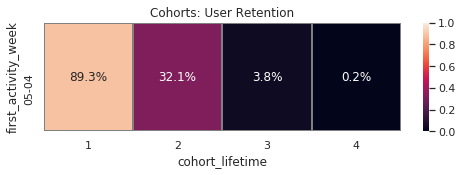

In [139]:
sns.set(style='white')
plt.figure(figsize=(8, 2))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=1); 

Конечно ещё в начале задания мы знали, что у нас будет только одна когорта, если формировать по неделям (в базе игроки, начавшие играть с 4 по 10 мая включительно). На третью неделю в игре ещё находяться 32% игроков, но через месяц уже почти никого не осталось. Оно и понятно, многие уже заканчивают прохождение первого уровня

### Посчитаем САС

мы уже ранее посчитали стоимость привлечения игрока для каждого из источника

In [140]:
user_source_sum_costs

,source,count_id,per_gamer,cost,player_cost
0,facebook_ads,2726,0.201,"2,140.905",0.785
1,instagram_new_adverts,3347,0.247,"2,161.442",0.646
2,yandex_direct,4817,0.355,"2,233.111",0.464
3,youtube_channel_reklama,2686,0.198,"1,068.119",0.398


In [141]:
all_costs_reklama = user_source_sum_costs['cost'].sum()
print('Общие затраты на рекламу: {:.2f} у.е.'.format(all_costs_reklama))

Общие затраты на рекламу: 7603.58 у.е.


In [142]:
# посчитаем среднюю стоимость за переход игрока
print('стоимость клика игрока: {:.2f} у.е.'.format(user_source_sum_costs['player_cost'].mean()))

стоимость клика игрока: 0.57 у.е.


### Какая маржинальность нам нужна? Посчитаем LTV, ROMI и суммарные потенциальные выручки нашей когорты

Мы знаем наши затраты на рекламу. Мы сами планруем зарабтывать на рекламе, показывая её при строительстве зданий, проектов и и завершении уровня, когда наши игроки будут переходить по ней. Нам нужно определить, при какой цене и вероятности перехода затраты маркетинг, привлечение игрока, будут окупаться

In [143]:
user_source_sum_costs

,source,count_id,per_gamer,cost,player_cost
0,facebook_ads,2726,0.201,"2,140.905",0.785
1,instagram_new_adverts,3347,0.247,"2,161.442",0.646
2,yandex_direct,4817,0.355,"2,233.111",0.464
3,youtube_channel_reklama,2686,0.198,"1,068.119",0.398


In [144]:
# завершивших уровень победой
victory = game_actions[game_actions['type_finish'] == 2]


Установим наши метрики. Вероятность клика, стоимость перехода, кол-во уровней.

LTV = количество событий * маржинальность / число игроков. У нас данные за один месяц, их и посчитаем

ROMI =  LTV / CAC

Далее мы постараемся примерно узнать, когда смогут окупиться затраты на рекламу, в зависимости от типа тактики

In [145]:
# наши метрики вероятность клика, стоимость клика и кол-во уровней, необходимое для окупаймости

per_click = 1
cost_rek = 0.07

# кол-во уровней
n = 10

In [146]:
# наша маржинальность рекламы
margin_rate = per_click * cost_rek 

In [147]:
victory_romi = (victory['event'].count() * margin_rate / victory[
            'user_id'].nunique()  / user_source_sum_costs['player_cost'].mean())

print('ROMI для игроков воителей: {:.2f}'.format(victory_romi))

ROMI для игроков воителей: 1.27


In [148]:
# завершивших уровень проектом
project = game_actions[game_actions['type_finish'] == 3]

In [149]:
# кол-во уровней
n = 7

In [150]:
project_romi = (project['event'].count() / project[
            'user_id'].nunique() * margin_rate  / user_source_sum_costs['player_cost'].mean())

print('ROMI для игроков проектировщиков: {:.2f}'.format(project_romi))

ROMI для игроков проектировщиков: 1.79


In [151]:
# не завершивших уровень
loser = game_actions[game_actions['type_finish'] == 1]

In [152]:
# не прошедших
loser_romi = (loser['event'].count() / loser[
            'user_id'].nunique() * per_click * cost_rek / user_source_sum_costs['player_cost'].mean())

print('ROMI для игроков не прошедших уровень: {:.2f}'.format(loser_romi))

ROMI для игроков не прошедших уровень: 1.06


In [153]:
loser_revenue = loser['event'].count() * per_click * cost_rek
project_revenue = project['event'].count() * per_click * cost_rek
victory_revenue = victory['event'].count() * per_click * cost_rek
sum_revenue = victory_revenue + project_revenue + loser_revenue

In [154]:
print('Вероятная выручка воителей: {:.2f} USD'.format(victory_revenue))
print('Вероятная выручка проектировщиков: {:.2f} USD'.format(project_revenue))
print('Вероятная выручка не прошедших уровень: {:.2f} USD'.format(loser_revenue))
print('Вероятная суммарная выручка: {:.2f} USD'.format(sum_revenue))
print()
print('Сумма наших затрат на рекламу: {:.2f} USD'.format(user_source_sum_costs['cost'].sum()))

Вероятная выручка воителей: 2879.52 USD
Вероятная выручка проектировщиков: 1913.31 USD
Вероятная выручка не прошедших уровень: 4701.90 USD
Вероятная суммарная выручка: 9494.73 USD

Сумма наших затрат на рекламу: 7603.58 USD


In [155]:
print('Прибыль воителей: {:.2f} USD'.format(victory_revenue - victory[
            'user_id'].nunique() * user_source_sum_costs['player_cost'].mean()))
print('Прибыль проектировщиков: {:.2f} USD'.format(project_revenue - project[
            'user_id'].nunique() * user_source_sum_costs['player_cost'].mean()))
print('Прибыль не прошедших уровень: {:.2f} USD'.format(loser_revenue - loser[
            'user_id'].nunique() * user_source_sum_costs['player_cost'].mean()))
print()
print('Суммарная прибыль: {:.2f} USD'.format(sum_revenue - user_source_sum_costs['cost'].sum()))

Прибыль воителей: 615.20 USD
Прибыль проектировщиков: 843.90 USD
Прибыль не прошедших уровень: 255.22 USD

Суммарная прибыль: 1891.15 USD


### Выводы

Мы узнали через сколько окупится каждая из групп игроков при наших коэффициентах. Посчитали вероятную выручку во время прохождения игроками первого уровня. ЛУчше всего окупаются проектировщики, далее воители, непрошедшие окупаются с трудом.

- Прибыль воителей: 615.20 USD
- Прибыль проектировщиков: 843.90 USD
- Прибыль не прошедших уровень: 255.22 USD
- Суммарная прибыль: 1891.15 USD

Такие показатели говорят, что в гипотетической ситуации реклама, если её показывать при каждой постройке, окупается.

Предлагаю добавить в нашу монетизацию месячные премиум аккаунты, не меняющие баланс PvP стражений. (у нас же как я понимаю онлайн игра). Стоимость 5 у.е., вероятность его покупки 5% среди игроков прошедших первый уровень. Рассчитаем

In [156]:
per_premium = 0.05
cost_premium = 25

In [157]:
sum_revenue_premium = (victory['user_id'].nunique() + project['user_id'].nunique()) * cost_premium * per_premium
print('Вероятная выручка за премиум аккаунты: {:.2f} USD'.format(sum_revenue_premium))

Вероятная выручка за премиум аккаунты: 7271.25 USD


Если мы введём премиум аккаунты стоимостью 25 у.е., при вероятности покупки в 5% доход составит 7271.25 у.е.. Это позволит нам компенсировать возможные риски 

## Выводы и рекомендации

Мы провели анализ данных, построили графики распределения и провели статтесты.

- Всего игроков у нас 13576, все они начинают строить здания. 
- Доля игроков, закончивших первый уровень: 42.8%
- Доля игроков, закончивших первый уровень через проект: 13.7%
- Доля игроков, закончивших первый уровень через победу над врагом: 29.1%

Среднее количество различных событий на игрока в день: 1.33

Среднее время прохождения первого уровня: 11.36 дней. 95% игроков укладывается за 18.2 суток (455.8 часов), 99% за 22 дня (543.7 часов)

- Среднее время прохождения первого уровня через проект: 323.01 часов
- Среднее время прохождения первого уровня через победу над врагом: 266.51 часов
- Среднее время прохождения первого уровня: 284.63 часов

Игроки побеждающие врага в среднем тратят на 50 часов меньше времения для прохождения первого уровня.


| building_type |	mean_loser |	mean_project |	mean_victory | mean_finish | per_victory_project_% | per_victory_loser_% |
|---------------|--------------|-----------------|---------------|-------------|-----------------------|---|
| assembly_shop |	3.748 |	4.885 |	4.125 |	4.369 | 18.4% | 10% |
| research_center |	1.930 |	1.981 |	1.603 |	1.771 | 23.5% | -16.9% |
| spaceport |	4.204 |	5.781 |	4.400 |	4.847 | 31.4% | 4.6% |

Наш тесты говорят о статистической разнице, что уже через 3 с половиной часа игры в среднем кол-ве зданий для игроков с разными тактиками начинают появлятся значимые отличия.

Активность наших игроков в день (DAU)
- среднее значение DAU для проектировщиков: 561.88
- среднее значение DAU для воителей: 872.91
- среднее значение DAU для всех: 2884.88

На второй недели у нас 89% игроков, на третью неделю в игре ещё находяться 32% игроков, но через месяц уже почти никого не осталось. Оно и понятно, многие уже заканчивают прохождение первого уровня

Анализ источников. Количество привлечённых игроков:  

| Источник |n игроков |% игроков|стоимость игрока|сумма рекламы|стоимость игрока|
|:-------:|:--------:|:--------:|:--------------:|:-----------:|:--------------:|
|facebook |2726      |0.201     | 0.785          | 2,140.9     | 0.78 |
|instagram|3347      |0.247     | 0.646          | 2,161.4     | 0.65 |
|yandex_direct |4817 |0.355     | 0.464          | 2,233.1     | 0.46 | 
|youtube_channel_reklama |2686 |0.198| 0.398     | 2686        | 0.40 |

Как мы можем заметить, стоимость привлечения игрока самая низкая в yandex_direct и youtube_channel_reklama соответственно. А так как процент завершивших первый уровень у всех одинаковый (27%), то очевидно, что выгоднее все привлекать игроков через youtube_channel_reklama и yandex_direct

Наши коэффициенты для монетизации через рекламу
- per_click = 1
- cost_rek = 0.07 USD

- Вероятная выручка воителей: 2879.52 USD
- Вероятная выручка проектировщиков: 1913.31 USD
- Вероятная выручка не прошедших уровень: 4701.90 USD
- Вероятная суммарная выручка: 9494.73 USD

- Сумма наших затрат на рекламу: 7603.58 USD


- Прибыль воителей: 615.20 USD
- Прибыль проектировщиков: 843.90 USD
- Прибыль не прошедших уровень: 255.22 USD
- Суммарная прибыль: 1891.15 USD

Такие показатели говорят, что в гипотетической ситуации реклама, если её показывать при каждой постройке, окупается.

Предлагаю дополнительно добавить в нашу систему монетизации систему премиум аккаунтов. Если мы их введём, стоимостью 25 у.е., при вероятности покупки в 5% для игроков, прошедших уровень, доход составит 7271.25 у.е.. Это позволит компенсировать в будущем возможные риски


## Ссылки на презентацию и дашборд

Презентация в формате PDF 

https://disk.yandex.ru/i/O0NJXo7-hMk0GA

Ссылка на дашборд

https://public.tableau.com/app/profile/mikhail3700/viz/game_actions_16345010261530/Dashboard1?publish=yes

и на второй
https://public.tableau.com/app/profile/mikhail3700/viz/game_actions_16345010261530/Dashboard2?publish=yes